In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [19]:
data=pd.read_csv('train.csv')
data.head
data.columns

Index(['PID', 'Text_data', 'Label'], dtype='object')

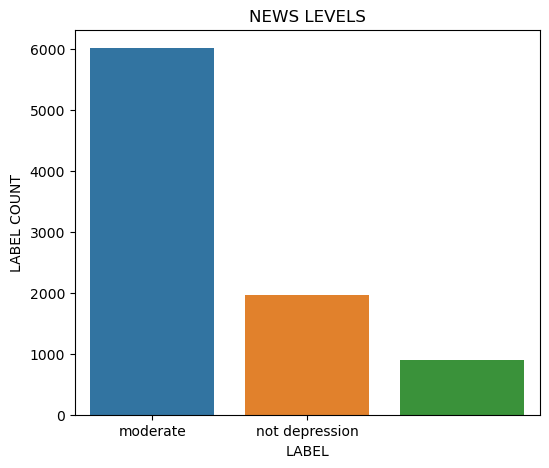

In [20]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=data)

# Add title and labels for clarity
plt.title('NEWS LEVELS')
plt.xlabel('LABEL')
plt.ylabel('LABEL COUNT')
plt.xticks([0, 1])  # Ensuring only 0 and 1 are shown on the x-axis

# Show the plot
plt.show()

In [21]:
print(data['Label'].value_counts())



Label
moderate          6019
not depression    1971
severe             901
Name: count, dtype: int64


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Extract features and labels
X = data['Text_data']
y = data['Label']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

# Convert TF-IDF features back to text data
X_res_text = vectorizer.inverse_transform(X_res)
df_resampled = pd.DataFrame({'PID': range(len(y_res)), 'Text_data': [' '.join(text) for text in X_res_text], 'Label': y_res})

print(df_resampled['Label'].value_counts())


Label
moderate          6019
not depression    6019
severe            6019
Name: count, dtype: int64


In [25]:
import nlpaug.augmenter.word as naw

# Initialize the augmenter
augmenter = naw.SynonymAug(aug_src='wordnet')

# Define a function to augment text data
def augment_text(text):
    return augmenter.augment(text)

# Apply the text augmentation to the resampled data
df_resampled['Text_data'] = df_resampled['Text_data'].apply(augment_text)

print(df_resampled.head())


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sreevishak/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


   PID                                          Text_data     Label
0    0  [normal feels palpate and act way weird it wai...  moderate
1    1  [want all is serotonin lot asking crap this wi...  moderate
2    2  [thats moron hammerd your pilar cyst because e...  moderate
3    3  [fine than hope anyways maybe interesting wors...  moderate
4    4  [go cried dark ride myself great 2020 into and...  moderate


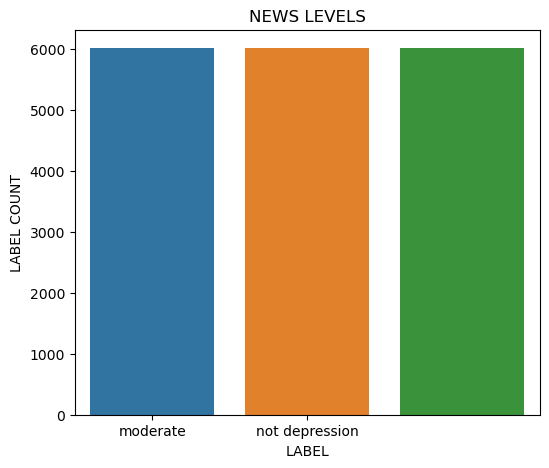

In [27]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=df_resampled)

# Add title and labels for clarity
plt.title('NEWS LEVELS')
plt.xlabel('LABEL')
plt.ylabel('LABEL COUNT')
plt.xticks([0, 1])  # Ensuring only 0 and 1 are shown on the x-axis

# Show the plot
plt.show()

In [28]:
# Save the augmented dataset to a CSV file
df_resampled.to_csv('augmented_dataset.csv', index=False)